In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine,reflect=True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
#using the inspector to collect the names of tables within the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
#using the inspector to collect the columns names within the tables
column1 = inspector.get_columns('measurement')
for a in column1:
    print(a["name"],a["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
column2 = inspector.get_columns('station')
for a in column2:
    print(a['name'],a['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Save references to each table 1
Measurement = Base.classes.measurement

In [12]:
# Save references to each table 2
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [14]:
#use engine execute to select and display the first 10 rows from the ,MEASUREMENT TABLE
engine.execute("Select * from Measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [15]:
#use engine execute to select and display the first 10 rows from the ,STATION TABLE
engine.execute("Select * from Station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
con = engine.connect()
df = pd.read_sql("Select * from Station",con)
df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [17]:
con = engine.connect()
df2 = pd.read_sql("Select * from Measurement",con)
df2

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Exploratory Climate Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

In [19]:
#1. Calculate the date 1 year ago from the last data point in the database
#find out the last date in this dataset
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(type(last_date))
last_date

<class 'sqlalchemy.engine.row.Row'>


('2017-08-23',)

In [20]:
#find the date that is one year ago from this last_date
# date 1 year ago from today
from dateutil.relativedelta import relativedelta
lastdate = dt.datetime(2017,8,23)  #change from row to datetime format for calculation
year_ago =lastdate - dt.timedelta(days=365)
year_ago  #datetime format

datetime.datetime(2016, 8, 23, 0, 0)

In [21]:
# last_year = dt.datetime(2016,8,23)
# last_year

In [22]:
# Perform a query to retrieve the data and precipitation scores
sel = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date.between(year_ago, lastdate)).order_by(Measurement.date).all()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df = pd.DataFrame(sel)

#syntax : df2 = df.rename({'a': 'X', 'b': 'Y'}, axis=1) 
prcp_df2 = prcp_df.rename(columns={0:"Date",1: "Precipitation"})
prcp_df2

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [24]:
# set date as Index and sort values by date
set_index_df=prcp_df2.set_index("Date")
set_index_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


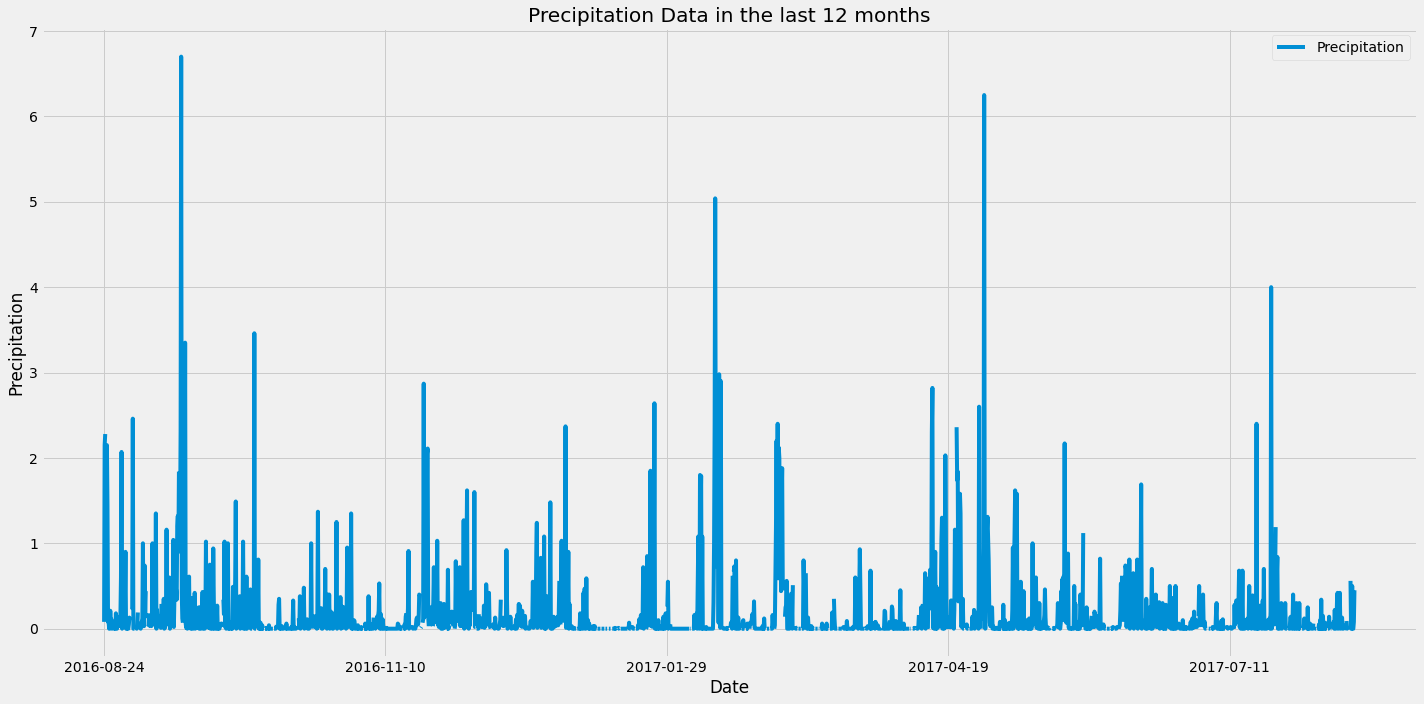

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))

set_index_df.plot(ax = ax, x_compat = True)

#title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
ax.set_title("Precipitation Data in the last 12 months")

plt.savefig("Images/precipitation.png")

#plot
plt.tight_layout()
plt.show()

In [26]:
#use pandas to print the summary statistics for the precipitation date

set_index_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [27]:
### Design a query to show how many stations are available in this dataset?
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [28]:
#1. Design a query to calculate the total number of stations
count_station = session.query(Station.station).distinct().count()
print(f'Total no of stations is {count_station}')
count_station

Total no of stations is 9


9

In [29]:
#2. Design a query to find the most active stations (stations that have the most rows)
# # List the stations and the counts in descending order.
station_valuecount = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_valuecount

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
#highest no of observations = most active stations
topstation =  session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print(f'Most active station with highest number of observations is {topstation}. ')

Most active station with highest number of observations is ('USC00519281', 2772). 


In [31]:
#Checking the datatype
type(topstation)

sqlalchemy.engine.row.Row

In [32]:
    # Convert list of tuples into normal list
topstation_list = list(np.ravel(topstation))
type(topstation_list)
topstation_list

['USC00519281', '2772']

In [33]:
#3. Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = "USC00519281"
session.query(Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [34]:
top_station_name = session.query(Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == topstation_list[0]).all()
# Convert list of tuples into normal list
top_station_name = list(np.ravel(top_station_name))
print(f'The most active station is {top_station_name[0]}. ')
print(f'The lowest temperature ever recorded was {top_station_name[1]}. ')
print(f'The highest temperature ever recorded was {top_station_name[2]}. ')
print(f'The average temperature ever recorded was {top_station_name[3]}. ')

The most active station is USC00519281. 
The lowest temperature ever recorded was 54.0. 
The highest temperature ever recorded was 85.0. 
The average temperature ever recorded was 71.66378066378067. 


In [35]:
# 4.  Design a query to retrieve the last 12 months of temperature observation date TOBS
# Choose the station with the highest number of temperature observations.
tobs_observation = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active).filter(Measurement.date.between(year_ago, lastdate)).order_by(Measurement.date).all()
tobs_observation
# #put the info into dataframe for the format
tobs_list = pd.DataFrame(tobs_observation).rename(columns = {0:'Date',1:'TOBS'})
# tobs_list= tobs_list.set_index('Station')
# tobs_list.head()
tobs_list

,Date,TOBS
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


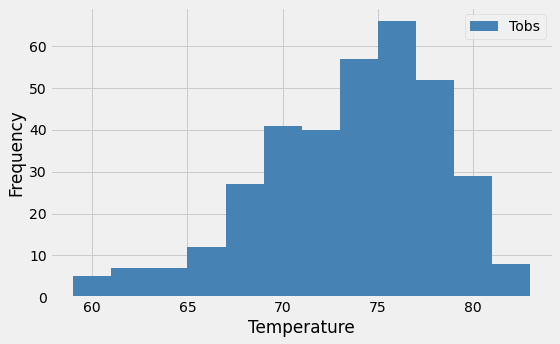

In [36]:
#5. Query the last 12 months of temperature observation data for this station and plot the results as a histogram
fig, ax = plt.subplots(figsize = (8,5))
#plt.hist(data, bins=30, normed=True, alpha=0.5,histtype='stepfilled', color='steelblue',edgecolor='none');
plt.hist(tobs_list["TOBS"],bins=12,color='steelblue',edgecolor='none')
#adding labels
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["Tobs"])
#save the fig
plt.savefig("stationtemp_analysis.png")

#plot
plt.tight_layout()
plt.show()

# #Temperature Analysis I

In [37]:
measure_df = pd.read_csv('Resources/hawaii_measurements.csv')
measure_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [38]:
# overwriting data after changing format
measure_df["date"]= pd.to_datetime(measure_df["date"])
measure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [39]:
measure_df['Month'] = pd.DatetimeIndex(measure_df['date']).month
measure_df.head()

,station,date,prcp,tobs,Month
0,USC00519397,2010-01-01,0.08,65,1
1,USC00519397,2010-01-02,0.00,63,1
2,USC00519397,2010-01-03,0.00,74,1
3,USC00519397,2010-01-04,0.00,76,1
4,USC00519397,2010-01-06,NaN,73,1


In [40]:
measure_df2 = measure_df[["station","Month","tobs"]]
measure_df2

,station,Month,tobs
0,USC00519397,1,65
1,USC00519397,1,63
2,USC00519397,1,74
3,USC00519397,1,76
4,USC00519397,1,73
...,...,...,...
19545,USC00516128,8,71
19546,USC00516128,8,78
19547,USC00516128,8,76
19548,USC00516128,8,76


In [41]:
avg_df = measure_df2.groupby("Month").mean()
avg_df = avg_df.reset_index()
avg_df

,Month,tobs
0,1,68.726115
1,2,69.442236
2,3,70.059067
3,4,72.357268
4,5,73.680900
5,6,74.944118
6,7,76.082408
7,8,76.412454
8,9,76.164865
9,10,75.391388


In [42]:
import scipy.stats as stats

In [43]:
june= avg_df.loc[avg_df['Month']==6,"tobs"]
dec = avg_df.loc[avg_df['Month']==12,"tobs"]

In [44]:
stats.ttest_ind(a=june.dropna(), b=dec.dropna(), equal_var=True)

C:\Users\linee\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\linee\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

## Bonus Challenge Assignment

In [45]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-06-20', '2016-06-30'))

[(71.0, 76.5068493150685, 81.0)]


In [46]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
holiday_start = '2016-06-20'
year_ago_data = datetime.strptime(holiday_start,"%Y-%m-%d") - dt.timedelta(days=365)
past_end_date = year_ago_data + dt.timedelta(days=9)

print("Last year data on the same date -- ")
info = calc_temps(year_ago_data, past_end_date)

for a in info:
    print(f'Min temperature : {a[0]}')
    print(f'Avg temperature : {a[1]}')
    print(f'Max temperature : {a[2]}')

Last year data on the same date -- 
Min temperature : 69.0
Avg temperature : 75.64516129032258
Max temperature : 81.0


In [47]:
info_list = list(info)

In [48]:
new_df = pd.DataFrame(info_list,columns = ['Min','Avg','Max'])
new_df

,Min,Avg,Max
0,69.0,75.645161,81.0


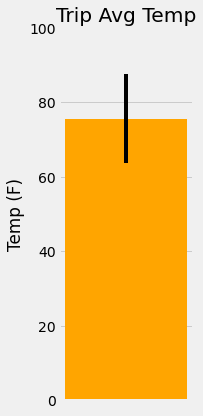

In [49]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig = plt.figure(figsize=(3,6))
plt.subplot()
plt.bar(x='0', height=new_df['Avg'] , yerr = (new_df['Max']-new_df['Min']), color='orange' )

plt.ylim(0,100)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.xticks([])
plt.savefig("TripAvgTemp.png")
plt.tight_layout()
plt.show()

# #Daily Rainfall Average

In [83]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfallstation = session.query(Station.name, Measurement.station, func.sum(Measurement.prcp), Station.latitude, Station.longitude).group_by(Measurement.station).filter(Station.station == Measurement.station).filter(Measurement.date.between (start_date , end_date)).all()
rainfall_df = pd.DataFrame(rainfallstation,columns = ['StationName','Station ID', 'Rainfall','Latitude','Longitude'])
rainfall_df

,StationName,Station ID,Rainfall,Latitude,Longitude
0,"KANEOHE 838.1, HI US",USC00513117,1.44,21.42340,-157.80150
1,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,1.21,21.52130,-157.83740
2,"MANOA LYON ARBO 785.2, HI US",USC00516128,4.00,21.33310,-157.80250
3,"PEARL CITY, HI US",USC00517948,0.10,21.39340,-157.97510
4,"WAIHEE 837.5, HI US",USC00519281,2.57,21.45167,-157.84889
5,"WAIKIKI 717.2, HI US",USC00519397,0.07,21.27160,-157.81680
6,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,0.27,21.33556,-157.71139


In [85]:
print(f'Start date : {start_date}')
print(f'End date : {end_date}')

Start date : 2016-06-20
End date : 2016-06-30


In [87]:
#USE THE DAILY NORMALS function to calculate the daily normals for a specific date. 

#this date string will be in the format 
#BE SURE TO use all the historic TOBS that match the date string
#THE DAILY NORMAL for the specific date


daily_normals('06-20')

[(68.0, 73.96491228070175, 85.0)]

In [53]:
#Create a list of dates for your trop


In [54]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [74]:
# # calculate the daily normals for your trip
# start_date = '2016-06-20'
# end_date = '2016-06-30'
# start = datetime.strptime(start_date,"%Y-%m-%d").date()
# end = datetime.strptime(end_date,"%Y-%m-%d").date()
# triplength = end-start
# # push each tuple of calculations into a list called `normals`

# # Set the start and end date of the trip

# # Use the start and end date to create a range of dates

# # Stip off the year and save a list of %m-%d strings

# # Loop through the list of %m-%d strings and calculate the normals for each date


In [56]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [57]:
# Plot the daily normals as an area plot with `stacked=False`
